In [1]:
import datetime

import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
# https://www.tepco.co.jp/forecast/html/download-j.html
# https://www.tepco.co.jp/forecast/html/images/juyo-{year}.csv

YEARS = [2016, 2017, 2018, 2019, 2020, 2021]

INPUT_DIR = "input/"

In [3]:
df = pd.read_csv(INPUT_DIR + 'daily.csv')
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year.astype('str')
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [4]:
df_pv = df.pivot(index=['month', 'day'], columns='year', values='power')

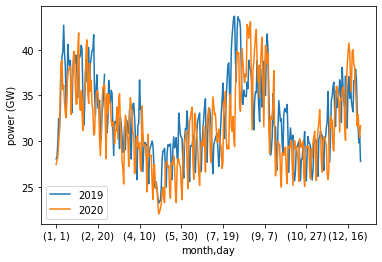

In [5]:
# df_pv["2017"].plot()
# df_pv["2018"].plot()
df_pv["2019"].plot()
df_pv["2020"].plot()
plt.ylabel('power (GW)')
plt.legend()
plt.show()

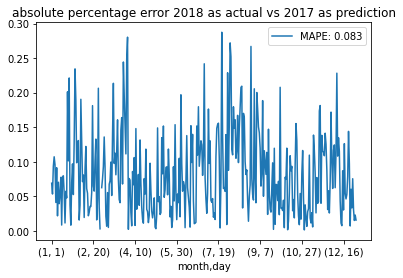

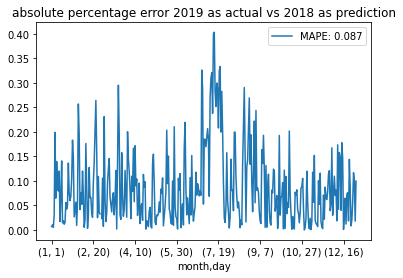

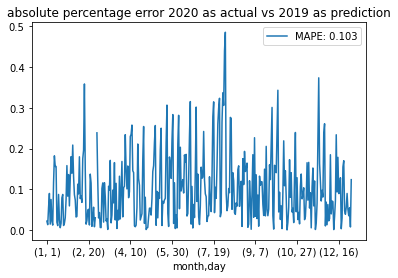

In [6]:
eval_years = ["2017", "2018", "2019", "2020"]
for i in range(len(eval_years))[:-1]:
    y_prev = eval_years[i]
    y_tar = eval_years[i+1]
    pred = df_pv[y_prev]
    actual = df_pv[y_tar]

    se_ape = (np.abs(pred - actual) / actual)
    se_pe = ((pred - actual) / actual)

    mape = se_ape.mean()

    plt.title(f'absolute percentage error {y_tar} as actual vs {y_prev} as prediction')
    se_ape.plot(label=f'MAPE: {mape:.3f}')
#     plt.plot([0, 52], [0, 0], "--")
    plt.legend()
    plt.show()